In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [26]:
X= iris.data
y = iris.target

In [27]:
X = X[y<2, :2]
y = y[y<2]

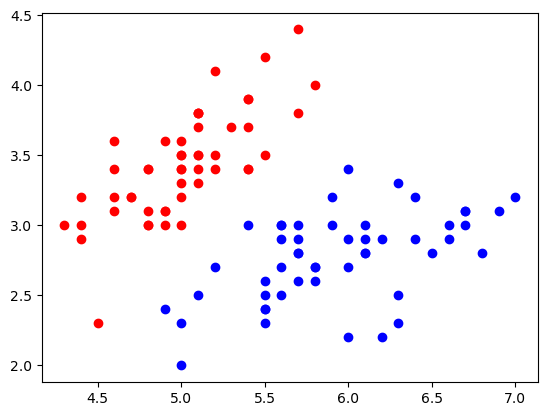

In [28]:
plt.scatter(X[y ==0, 0],X[y ==0, 1], color = 'red')
plt.scatter(X[y ==1, 0],X[y ==1, 1], color = 'blue')
plt.show()

### 使用逻辑回归  

In [29]:
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [30]:
from playML.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
log_reg.score(X_test, y_test)

1.0

In [32]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [33]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [34]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [35]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [36]:
log_reg.interception_

-0.6937719272911234

In [37]:
def x2(x1):
  return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [38]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

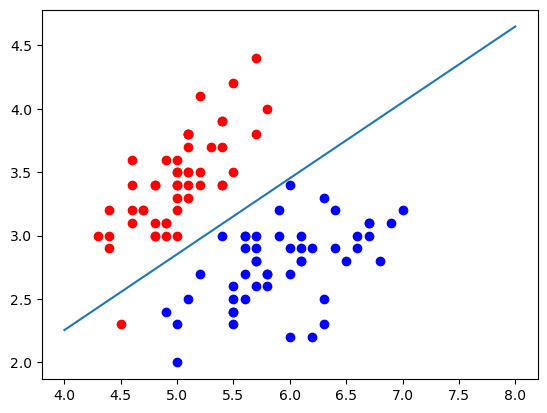

In [39]:
plt.plot(x1_plot, x2_plot)
plt.scatter(X[y ==0, 0],X[y ==0, 1], color = 'red')
plt.scatter(X[y ==1, 0],X[y ==1, 1], color = 'blue')
plt.show()

In [40]:
np.c_?

Type:        CClass
String form: <numpy.lib.index_tricks.CClass object at 0x000001E11E9A08D0>
Length:      0
File:        c:\users\acer\.conda\envs\ml\lib\site-packages\numpy\lib\index_tricks.py
Docstring:  
Translates slice objects to concatenation along the second axis.

This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

See Also
--------
column_stack : Stack 1-D arrays as columns into a 2-D array.
r_ : For more detailed documentation.

Examples
--------
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, ..., 4, 5, 6]])

In [56]:
axis=[4,7.5, 1.5, 4.5]

xx, yy = np.meshgrid(np.linspace(1,3,3), np.linspace(1,2,2))
xx.ravel()
yy.ravel()
X_new = np.c_[xx.ravel(), yy.ravel()]
# t1_tmp =np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 10))
# t2_tmp = np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 10))
# x0, x1 = np.meshgrid(
#     np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 10)),
#     np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 10))
#   )

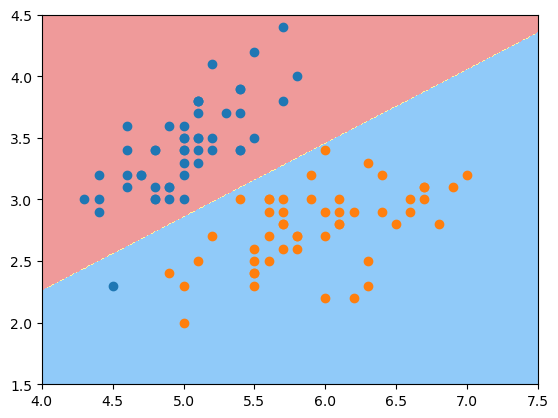

In [60]:
def plot_decision_boundary(model, axis):
  x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
  )
  X_new = np.c_[x0.ravel(), x1.ravel()]
  
  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)
  
  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
  
  plt.contourf(x0, x1, zz, cmap=custom_cmap)

plot_decision_boundary(log_reg, axis=[4,7.5, 1.5, 4.5])
plt.scatter(X[y ==0, 0], X[y==0, 1])
plt.scatter(X[y ==1, 0], X[y==1, 1])

### knn的决策边界

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
knn_clf.score(X_test, y_test)

1.0

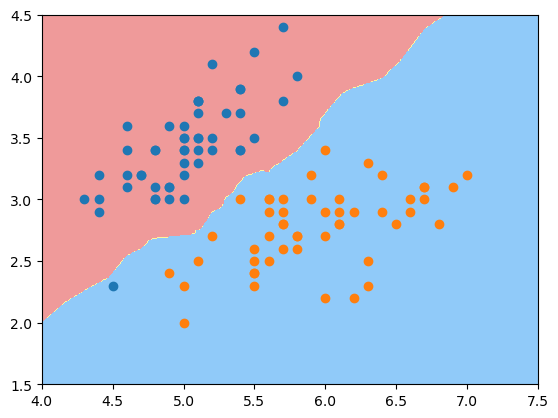

In [63]:
plot_decision_boundary(knn_clf, axis=[4,7.5, 1.5, 4.5])
plt.scatter(X[y ==0, 0], X[y==0, 1])
plt.scatter(X[y ==1, 0], X[y==1, 1])
plt.show()

In [67]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(n_neighbors=50)

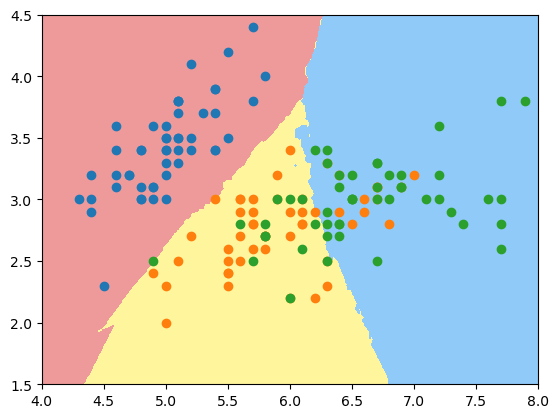

In [68]:
plot_decision_boundary(knn_clf_all, axis=[4,8, 1.5, 4.5])
plt.scatter(iris.data[iris.target ==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target ==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target ==2, 0], iris.data[iris.target==2, 1])

plt.show()